In [1]:
from CasinoMachine import CasinoMachine
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
class MachineHistory:
    def __init__(self):
        self.expected_reward = 0.0
        self.__sample_number = 0

    def update(self, new_sample) -> None:
        self.__sample_number += 1
        self.expected_reward += (new_sample - self.expected_reward) / self.__sample_number

    def get_expected_reward(self) -> float:
        return self.expected_reward


In [3]:
machines = [
    CasinoMachine(0.2),
    CasinoMachine(0.5),
    CasinoMachine(0.8),
    CasinoMachine(0.80001)
]

In [4]:
histories = [MachineHistory() for _ in machines]

max_itteration = 10000

rewards = np.zeros(max_itteration)
expected_rewards = np.zeros([max_itteration, len(machines)])
selected_machines = np.zeros(max_itteration)

epsilon = 0.9
min_epsilon = 0.01
epsilon_decrease_ratio = 0.999
epsilon_hisotry = np.zeros(max_itteration)

In [5]:
for i in range(max_itteration):
    selected_machine = None
    if random.random() < epsilon:
        selected_machine = random.randrange(0, len(machines))

    else:
        selected_machine = np.argmax([h.expected_reward for h in histories])

    selected_machines[i] = selected_machine
    rewards[i] = machines[selected_machine].pull()
    histories[selected_machine].update(rewards[i])
    epsilon_hisotry[i] = epsilon

    epsilon = max(epsilon * epsilon_decrease_ratio, min_epsilon)

    for h_i, h in enumerate(histories):
        expected_rewards[i, h_i] = h.get_expected_reward()

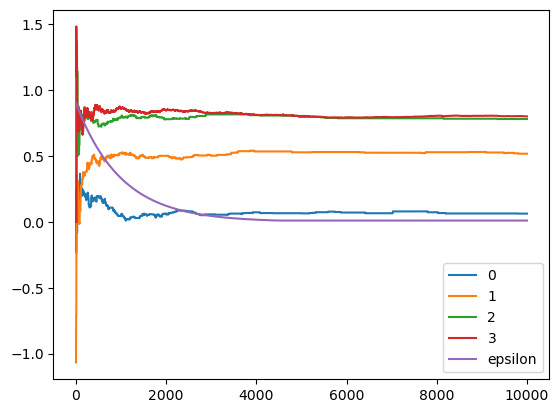

In [6]:
for i in range(len(machines)):
    plt.plot(expected_rewards[:, i], label=f'{i}')

plt.plot(epsilon_hisotry, label='epsilon')
plt.legend()
plt.show()

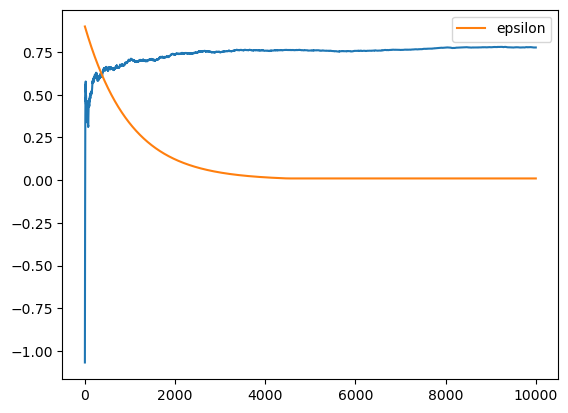

In [7]:
plt.plot(np.cumsum(rewards) / np.arange(1, max_itteration + 1))
plt.plot(epsilon_hisotry, label='epsilon')
plt.legend()
plt.show()

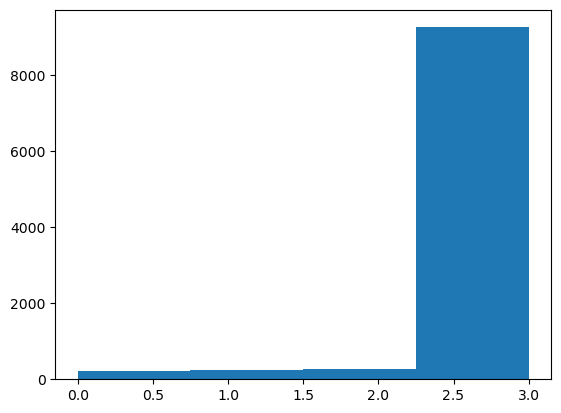

In [8]:
plt.hist(selected_machines, bins=len(machines))
plt.show()